<a href="https://colab.research.google.com/github/Navya04Shah/Projects/blob/main/Underlying%20statistics%20of%20SuperStoreOrders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Library Import

import math,os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Now you can access your Google Drive files from /content/drive/My Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/SuperStoreOrders.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [7]:
#HEADERS OF ALL THE COLUMNS
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
#DATA TYPES OF COLUMN
df.dtypes

,0
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_name,object
segment,object
state,object
country,object
market,object
region,object


In [9]:
#Which segment is the best seller?
df["segment"].value_counts()

,count
segment,
Consumer,26518
Corporate,15429
Home Office,9343


<Axes: xlabel='segment', ylabel='count'>

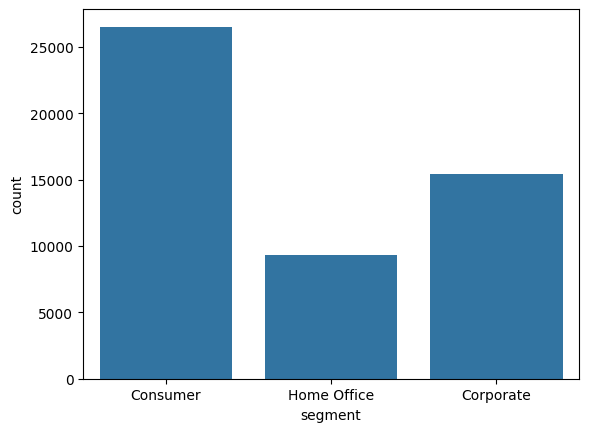

In [10]:
sns.countplot(x=df['segment'])

In [11]:
#Which Region has the highest order count and In which Region do we need to grow our Business?
df["region"].value_counts()

,count
region,
Central,11117
South,6645
EMEA,5029
North,4785
Africa,4587
Oceania,3487
West,3203
Southeast Asia,3129
East,2848


<Axes: xlabel='region', ylabel='count'>

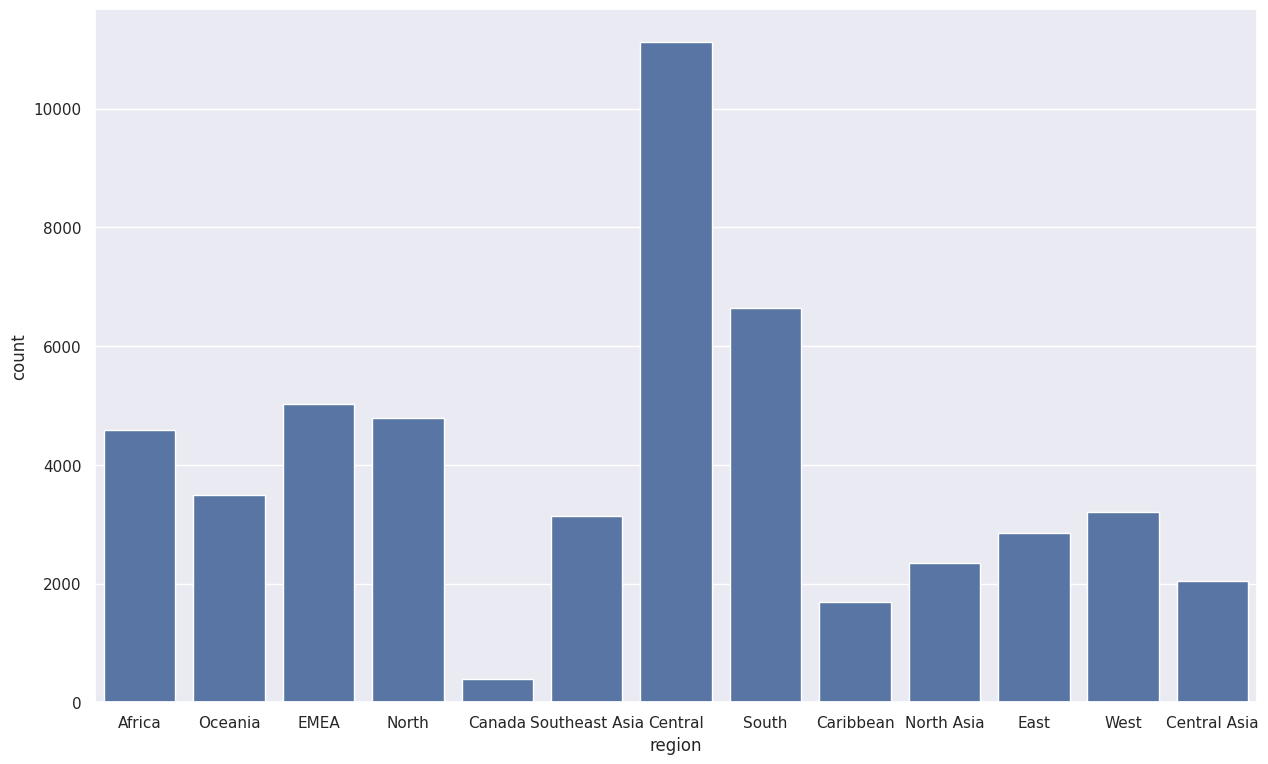

In [12]:
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x=df['region'])

In [13]:
 #What are the Top 10 States with highest Order Count?
 df['state'].value_counts().head(10)

,count
state,
California,2001
England,1499
New York,1128
Texas,985
Ile-de-France,981
New South Wales,781
North Rhine-Westphalia,719
Queensland,717
San Salvador,615


<Axes: ylabel='count'>

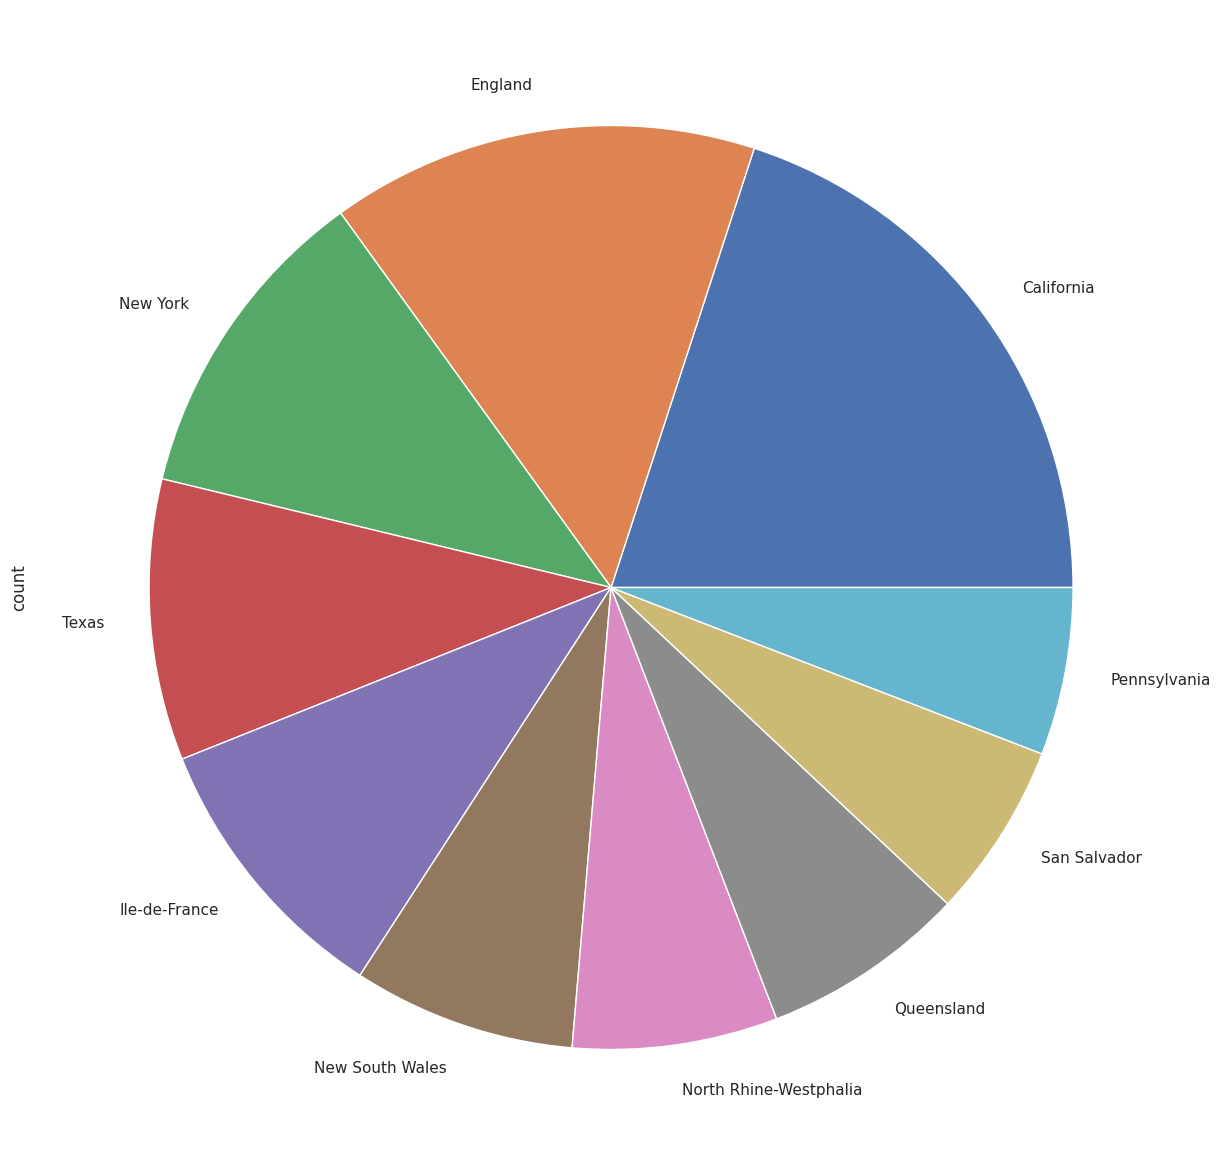

In [14]:
plt.figure(figsize=(20,15))
df['state'].value_counts().head(10).plot.pie()

In [15]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_feat = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_feat.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

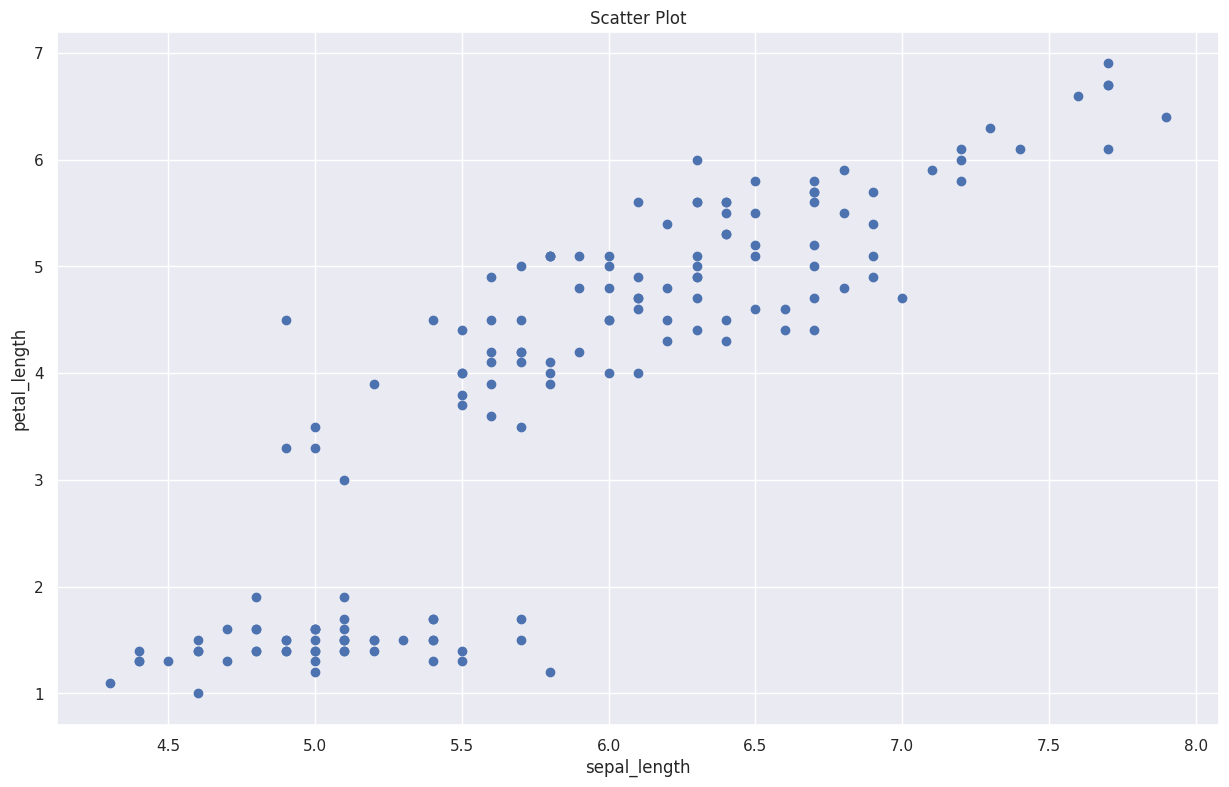

In [16]:
#Let's plot Scatter plot
# matplotlib

plt.scatter(x = iris_feat['sepal length (cm)'],y = iris_feat['petal length (cm)'],alpha=1) # Changed column names to match the actual column names in the DataFrame

plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
#Show the plot
plt.show()

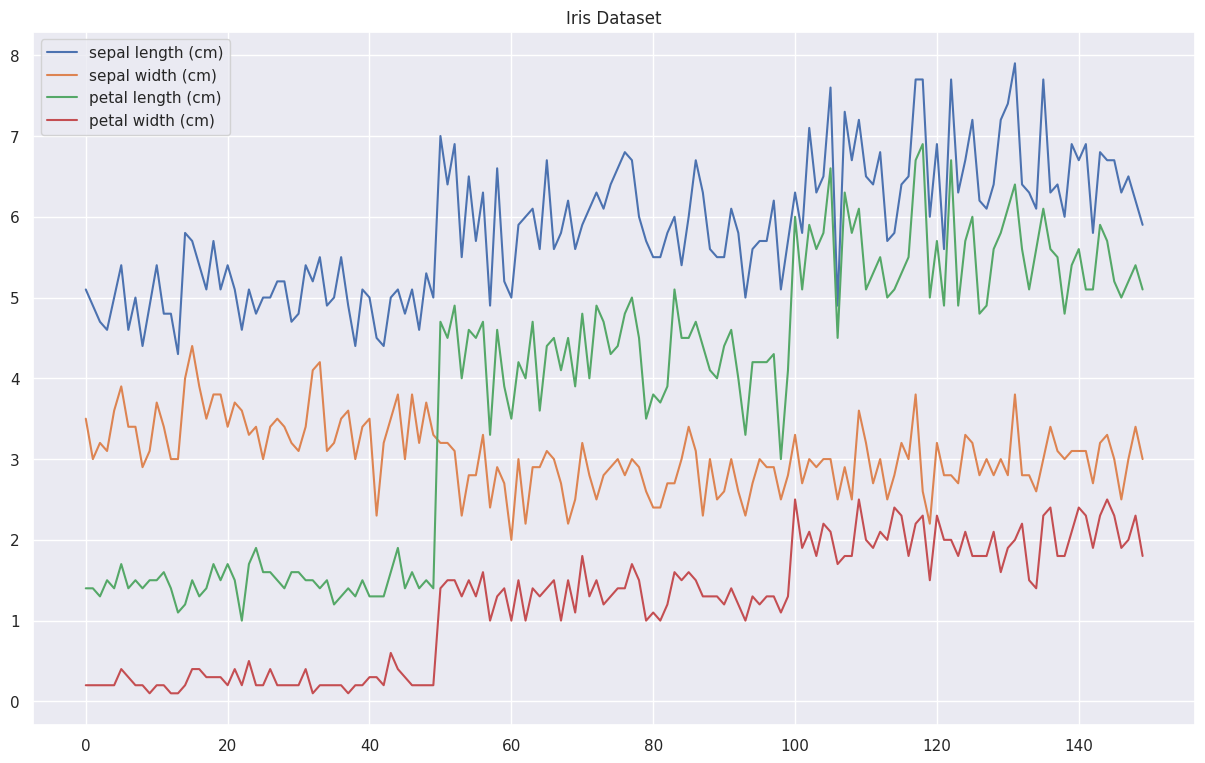

In [17]:
#Let's plot the Line Plot
# get columns to plot
columns = iris_feat.columns
# create x data
x_data = range(0, iris_feat.shape[0]) # Changed iris to iris_feat
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris_feat[column], label=column) # Changed iris to iris_feat
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Frequency')

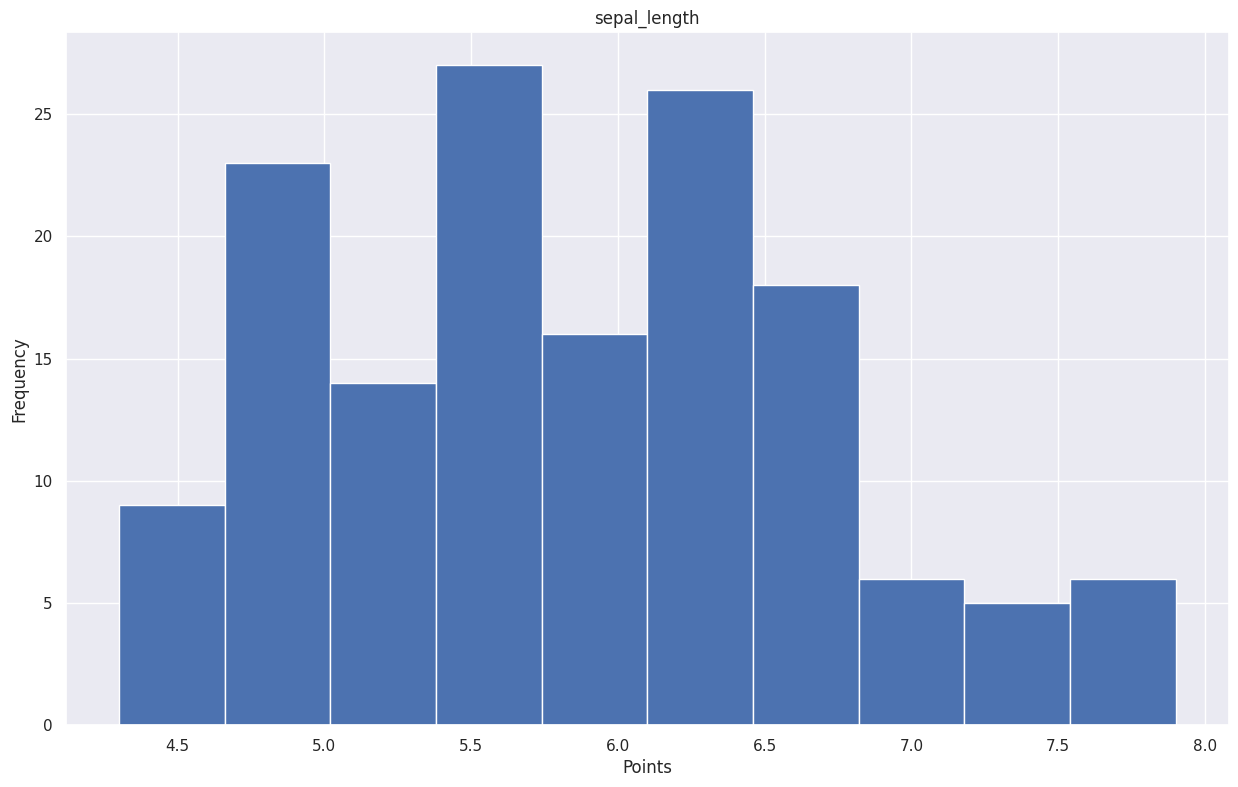

In [18]:
#Let's Histogram plot
fig, ax = plt.subplots()
# plot histogram
ax.hist(iris_feat['sepal length (cm)']) # Changed column name to match the actual column name in the DataFrame
# set title and labels
ax.set_title('sepal_length')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

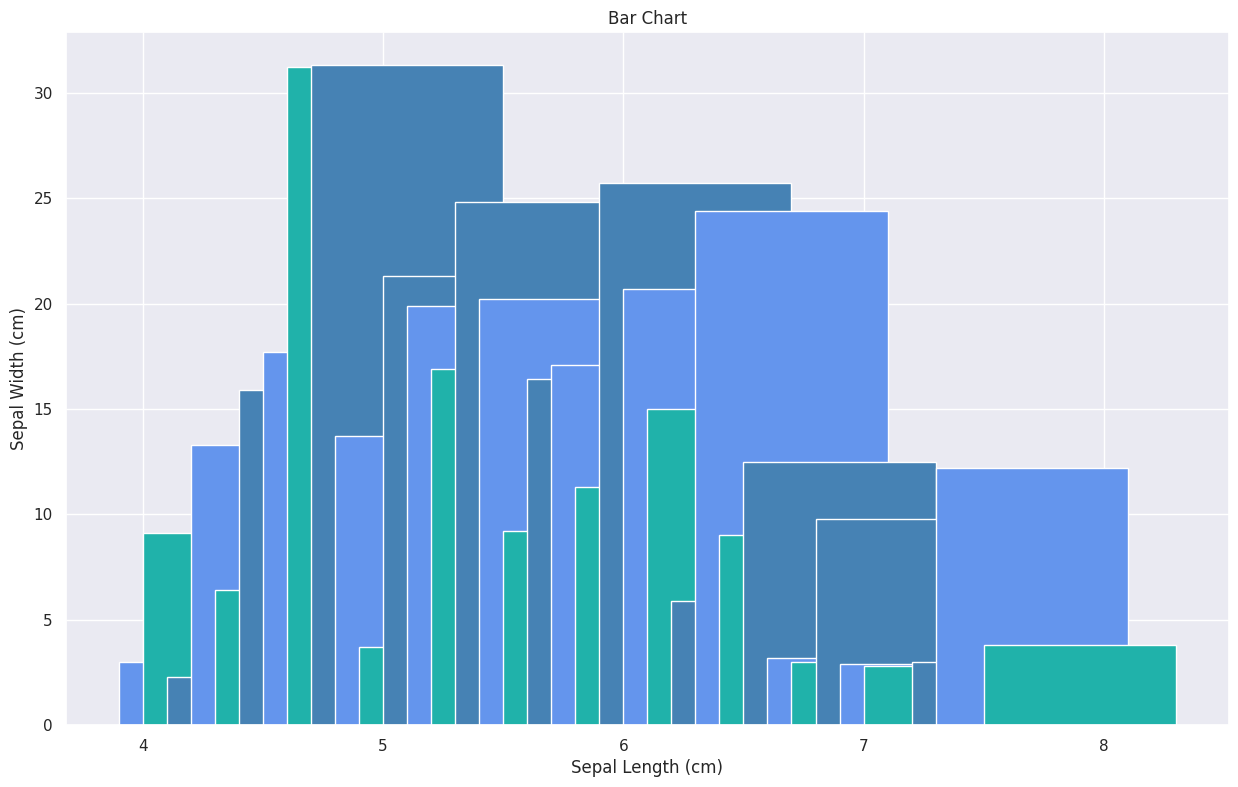

In [19]:
#Let's plot Bar Charts
df = iris_feat.groupby('sepal length (cm)')['sepal width (cm)'].sum().to_frame().reset_index() # Changed iris to iris_feat and used existing columns

#Creating the bar chart
plt.bar(df['sepal length (cm)'],df['sepal width (cm)'],color = ['cornflowerblue','lightseagreen','steelblue']) # Changed column names to match the changes above

plt.title('Bar Chart')
plt.xlabel('Sepal Length (cm)') # Changed to match changes above
plt.ylabel('Sepal Width (cm)') # Changed to match changes above

#Show the plot
plt.show()

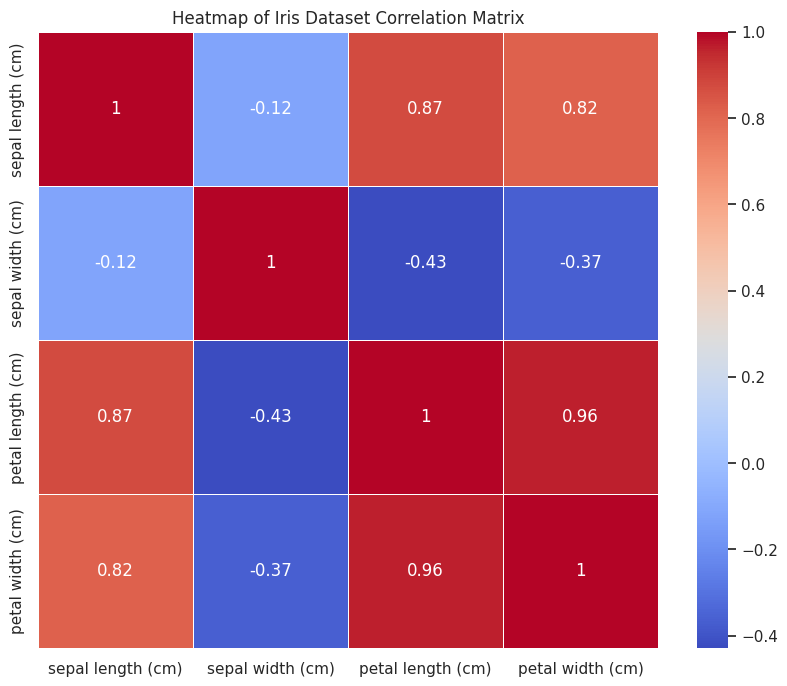

In [20]:
#Let's draw the Heatmap

# Calculate the correlation matrix
correlation_matrix = iris_feat.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Iris Dataset Correlation Matrix')
plt.show()